In [1]:
import matplotlib.pyplot as plt
import pandas as pds
import numpy as np

In [2]:
prefix=2021
dat = pds.read_csv('results{}/results_fig4.txt'.format(prefix), sep=' ', header=None)

In [3]:
n_sample = [int(x[-1]) for x in dat[0].str.split('-')]
dat['level'] = n_sample

In [4]:
rename_dict = {
       'oracle_all': 'Oracle Both',
    'oracle_po': 'Oracle PO', 'oracle_potential_cause': 'Oracle Cause',  '': 'SCP',  'predict_all_causes': 'Ablation', 'dor': 'NN-Ensemble', 'dor_real': 'NN-MoreObs', 'exact_single_cause': 'ABL-Single' 
    }


names = [rename_dict[x.split('-')[0][:-14]] for x in dat[0]]
dat['method'] = names

rename_dict = {
     'dor':'NN-Ensemble',  'predict_all_causes': 'Ablation', 'None': 'SCP', 'oracle_po':'Oracle PO'
    }


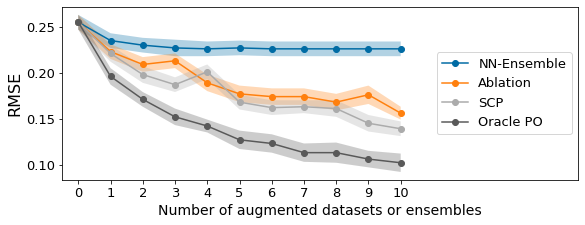

In [7]:
plt.figure(figsize=(8,3))
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = '13'

for method in list(rename_dict.values()):
    df_method = dat[dat['method'] == method].copy()


    plt.fill_between(df_method['level'], df_method[2] - df_method[3], df_method[2] + df_method[3], alpha=0.3)
    plt.plot(df_method['level'], df_method[2], '-o', label=method)
ax = plt.gca()
ax.set_xticks(np.unique(df_method['level']))
plt.legend(loc='center right')
plt.xlabel(r'Number of augmented datasets or ensembles', fontsize=14)    
plt.ylabel('RMSE', fontsize=16)
plt.tight_layout(pad=0.2)
plt.xlim([-0.5,15.5])
plt.savefig(fname='Fig4.png', dpi=300)